#### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


#### Features:



#### load libraries

In [94]:
import warnings
warnings.filterwarnings('ignore')
# data wrangling and analysis
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### load the dataset

In [2]:
df=pd.read_csv('customer_churn.csv')

## step-1 Descriptive Analysis

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

Our dataset has 7043 records of data divided among 20 independent features and 1 target feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Our dataset has 21 features divided amongst 20 independent features and 1 target feature which is 'Churn'. 

'object' type features - 18 features
'float64' type features - 1 feature
'int64' type features - 2 features

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The standard deviation of distribution of data in 'tenure' and 'MonthlyCharges' features is very high which shows that the distribution of data is away from the mean.

In [8]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+"%"

customerID          0.0%
gender              0.0%
SeniorCitizen       0.0%
Partner             0.0%
Dependents          0.0%
tenure              0.0%
PhoneService        0.0%
MultipleLines       0.0%
InternetService     0.0%
OnlineSecurity      0.0%
OnlineBackup        0.0%
DeviceProtection    0.0%
TechSupport         0.0%
StreamingTV         0.0%
StreamingMovies     0.0%
Contract            0.0%
PaperlessBilling    0.0%
PaymentMethod       0.0%
MonthlyCharges      0.0%
TotalCharges        0.0%
Churn               0.0%
dtype: object

In [9]:
round(df.isin([' ']).sum()/df.shape[0]*100,2).astype(str)+"%"

customerID           0.0%
gender               0.0%
SeniorCitizen        0.0%
Partner              0.0%
Dependents           0.0%
tenure               0.0%
PhoneService         0.0%
MultipleLines        0.0%
InternetService      0.0%
OnlineSecurity       0.0%
OnlineBackup         0.0%
DeviceProtection     0.0%
TechSupport          0.0%
StreamingTV          0.0%
StreamingMovies      0.0%
Contract             0.0%
PaperlessBilling     0.0%
PaymentMethod        0.0%
MonthlyCharges       0.0%
TotalCharges        0.16%
Churn                0.0%
dtype: object

We have missing values in the form of '(blank) ' in the **TotalCharges** feature 

Datatypes:

    18 features - object type
    2 features - int64 type
    1 feature - float64 type.

## Step-2 Exploaratory data analysis

we will create a **copy for analysis and modelling purposes**.

In [10]:
df_cp=pd.DataFrame(data=df)
df_cp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df_cp.shape

(7043, 21)

In [12]:
list_cols=df_cp.columns

In [13]:
list_cols[0]

'customerID'

##### 1.'customerID'

In [14]:
df_cp['customerID'].value_counts()

5214-CHIWJ    1
4227-OJHAL    1
4194-FJARJ    1
4013-GUXND    1
0229-LFJAF    1
             ..
5893-KCLGT    1
1209-VFFOC    1
2907-ILJBN    1
9490-DFPMD    1
5451-YHYPW    1
Name: customerID, Length: 7043, dtype: int64

We can ignore this column as it is just an identification number for our customers.

In [15]:
list_cols[1]

'gender'

##### 2.'gender'

In [16]:
df_cp['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

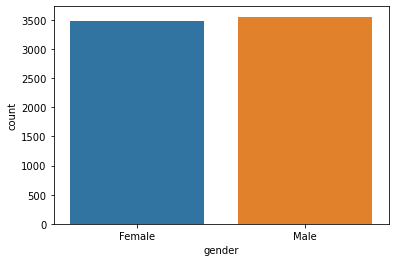

In [17]:
sn.countplot(df_cp['gender'])
plt.show()

Our dataset has equal count of values of users for 'gender' feature.

In [18]:
list_cols[2]

'SeniorCitizen'

##### 3.'SeniorCitizen'

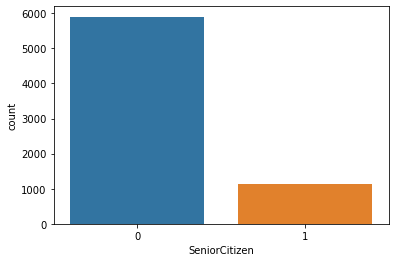

In [19]:
sn.countplot(df_cp['SeniorCitizen'])
plt.show()

Very few users are senior citizens of the teleco in our dataset.

In [20]:
list_cols[3]

'Partner'

##### 4.'Partner'

In [21]:
df_cp['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

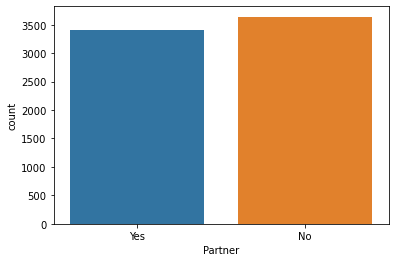

In [22]:
sn.countplot(df_cp['Partner'])
plt.show()

From above figure, we see that the data for 'Partner' feature is almost same showing that the number of couples and bachelor users are almost same

In [23]:
list_cols[4]

'Dependents'

##### 5.'Dependents'

In [24]:
df_cp['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

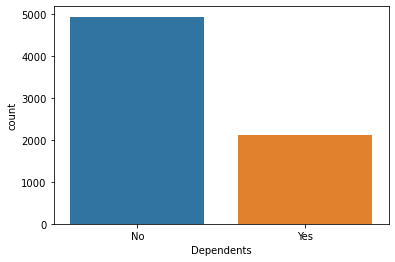

In [25]:
sn.countplot(df_cp['Dependents'])
plt.show()

From above figure, in our dataset, the number of users who are not having any dependents on them are more.

In [26]:
list_cols[5]

'tenure'

##### 6.'tenure'

In [27]:
df_cp['tenure'].dtypes

dtype('int64')

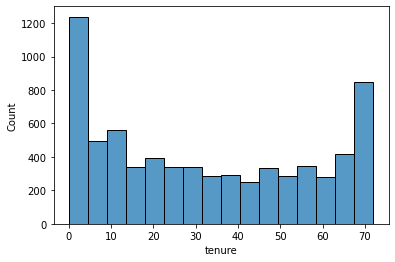

In [28]:
sn.histplot(df_cp['tenure'])
plt.show()

From above figure, we see that, in our dataset the number of users with tenure less than 5 are more followed by users with tenure more than 65.

In [29]:
list_cols[6]

'PhoneService'

##### 7.'PhoneService'

In [30]:
df_cp['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

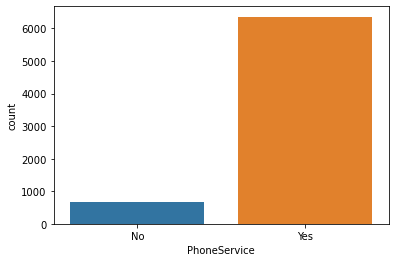

In [31]:
sn.countplot(df_cp['PhoneService'])
plt.show()

From above figure, in our dataset,we see that very few users have not been using the Phone Services.

In [32]:
list_cols[7]

'MultipleLines'

##### 8.'MultipleLines'

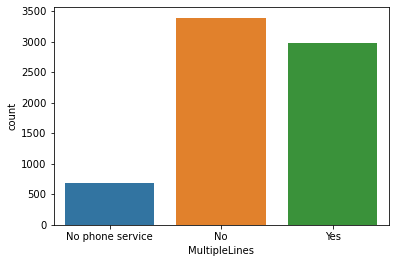

In [33]:
sn.countplot(df_cp['MultipleLines'])
plt.show()

From above figure, in our dataset, very few users are not using any Phone Service. The number of Phone Service users using Multiple Lines is same as the number of users not using it.

In [34]:
list_cols[8]

'InternetService'

##### 9.'InternetService'

In [35]:
df_cp['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

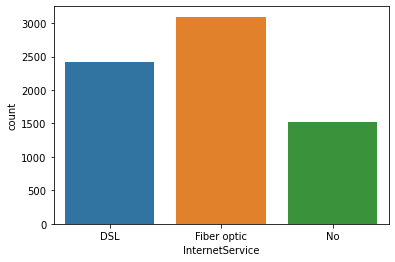

In [36]:
sn.countplot(df_cp['InternetService'])
plt.show()

From above figure, in our dataset, the number of users using Fiber Optic Internet Services is greater than the DSL Internet users. 

In [37]:
list_cols[9]

'OnlineSecurity'

##### 10.'OnlineSecurity'

In [38]:
df_cp['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

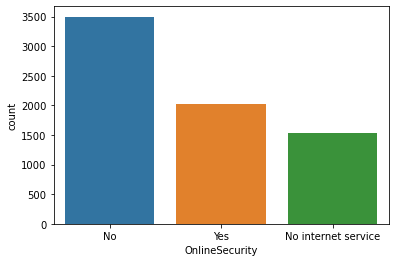

In [39]:
sn.countplot(df_cp['OnlineSecurity'])
plt.show()

From above figure, in our dataset many internet service users have not opted for Online Security service.

In [40]:
list_cols[10]

'OnlineBackup'

##### 11.'OnlineBackup'

In [41]:
df_cp['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

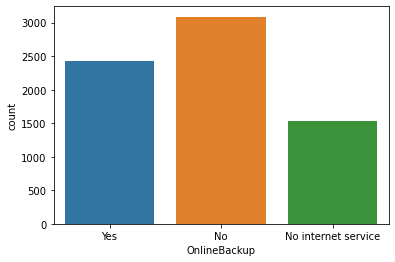

In [42]:
sn.countplot(df_cp['OnlineBackup'])
plt.show()

From above figure, in our dataset, the number of users who are using the Online Backup feature is less than the number of users not using it.

In [43]:
list_cols[11]

'DeviceProtection'

##### 12.'DeviceProtection'

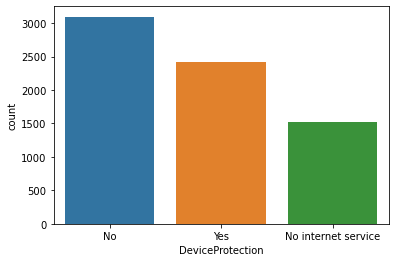

In [44]:
sn.countplot(df_cp['DeviceProtection'])
plt.show()

From above figure, in our dataset, the number of users who opted for the Device Protection service is less than the users who opted for it.

In [45]:
list_cols[12]

'TechSupport'

##### 13.'TechSupport'

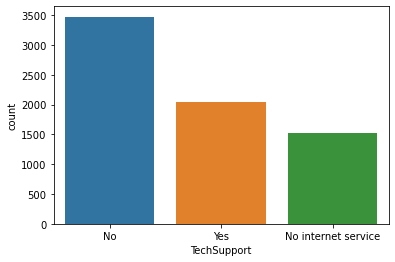

In [46]:
sn.countplot(df_cp['TechSupport'])
plt.show()

From above figure, in our dataset, many users have not used customer service.

In [47]:
list_cols[13]

'StreamingTV'

##### 14.'StreamingTV'

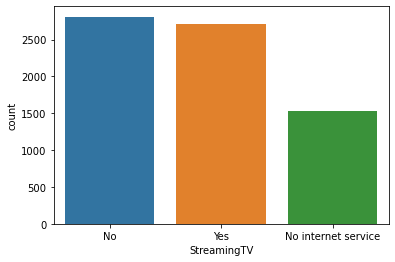

In [48]:
sn.countplot(df_cp['StreamingTV'])
plt.show()

from above figure, in our dataset, the number of internet service users who are using Streaming TV services is almost same as the number of users who are not using it.

In [49]:
list_cols[14]

'StreamingMovies'

##### 15.'StreamingMovies'

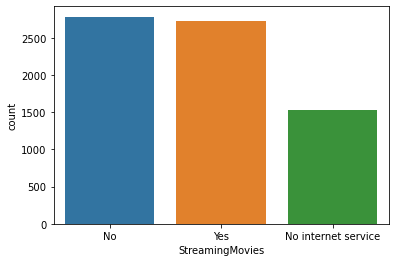

In [50]:
sn.countplot(df_cp['StreamingMovies'])
plt.show()

From above fig, in our dataset, the number of internet users who have subscribed for Straming Movies services is almost equal to the number of internet users who haven't subscribed to it.

In [51]:
list_cols[15]

'Contract'

##### 16.'Contract'

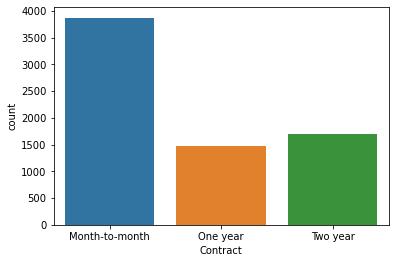

In [52]:
sn.countplot(df_cp['Contract'])
plt.show()

From above figure, in our dataset, the number of users who have opted for month-to-month contract is much greater than the number of users who opted for one or two year contracts.

In [53]:
list_cols[16]

'PaperlessBilling'

##### 17.'PaperlessBilling'

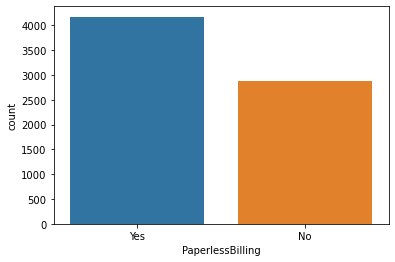

In [54]:
sn.countplot(df_cp['PaperlessBilling'])
plt.show()

From above figure, we see that most of the users have opted for Paperless Billing

In [55]:
list_cols[17]

'PaymentMethod'

##### 18.'PaymentMethod'

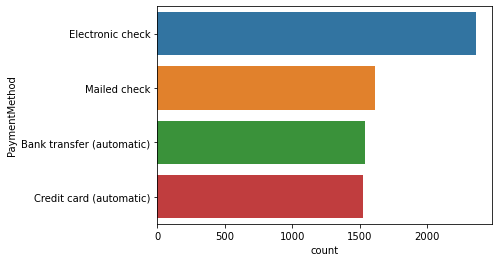

In [56]:
sn.countplot(y=df_cp['PaymentMethod'])
plt.show()

Electronic check has been most widely used medium for payments,

In [57]:
list_cols[18]

'MonthlyCharges'

##### 19.'MonthlyCharges'

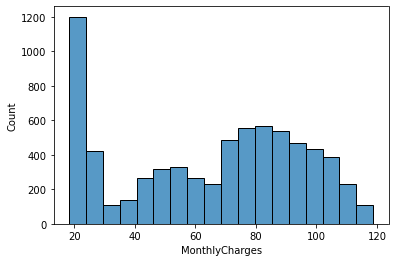

In [58]:
sn.histplot(df_cp['MonthlyCharges'])
plt.show()

The number of users with monthly charges less than 30 are very much high and after that most of the users are occuring monthly charges mostly aroud 80.

In [59]:
list_cols[19]

'TotalCharges'

##### 20.'TotalCharges'

In [60]:
df_cp['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
1097.15     1
147.8       1
2044.75     1
246.25      1
1959.5      1
Name: TotalCharges, Length: 6531, dtype: int64

In [61]:
round(df_cp['TotalCharges'].isin([' ']).sum()/df_cp['TotalCharges'].shape[0]*100,2).astype(str)+"%"

'0.16%'

In [62]:
# for value in df_cp['TotalCharges']:
#     if value==' ':
#         df_cp[value]=0

df_cp['TotalCharges'].replace(" ",0,inplace=True)

In [63]:
df_cp['TotalCharges']=df_cp['TotalCharges'].astype(float)

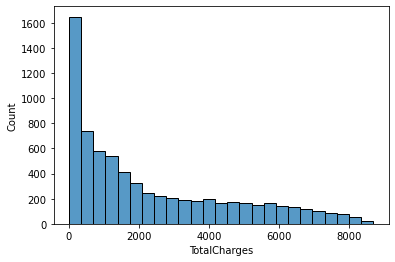

In [64]:
sn.histplot(df_cp['TotalCharges'])
plt.show()

In [65]:
list_cols[20]

'Churn'

##### 21.'Churn'

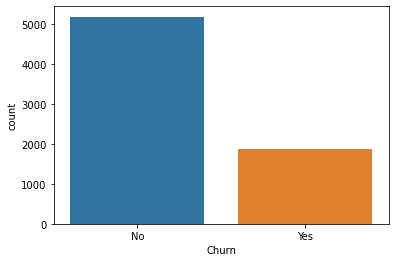

In [66]:
sn.countplot(df_cp['Churn'])
plt.show()

## Step-3 Data Pre-processing

In [67]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### missing values treatment

In [68]:
round(df.isnull().sum()/df.shape[0]*100,2).astype(str)+"%"

customerID          0.0%
gender              0.0%
SeniorCitizen       0.0%
Partner             0.0%
Dependents          0.0%
tenure              0.0%
PhoneService        0.0%
MultipleLines       0.0%
InternetService     0.0%
OnlineSecurity      0.0%
OnlineBackup        0.0%
DeviceProtection    0.0%
TechSupport         0.0%
StreamingTV         0.0%
StreamingMovies     0.0%
Contract            0.0%
PaperlessBilling    0.0%
PaymentMethod       0.0%
MonthlyCharges      0.0%
TotalCharges        0.0%
Churn               0.0%
dtype: object

### Outlier check

In [118]:
numerical_cols=[]
numerical_cols.clear()
for column in df:
    if df[column].dtypes!='object':
        numerical_cols.append(column)

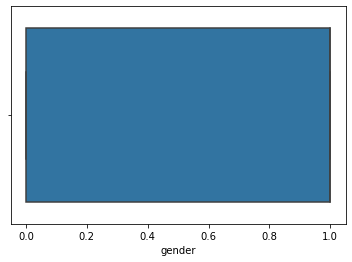

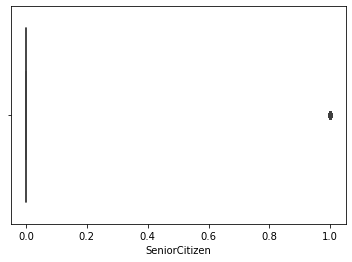

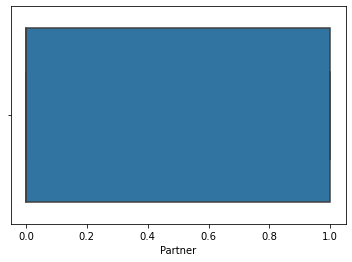

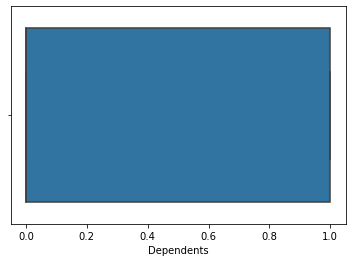

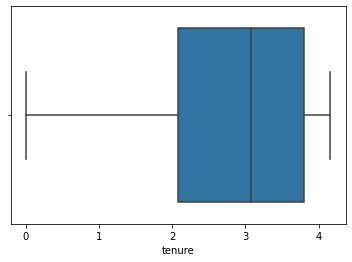

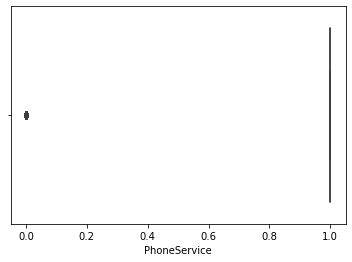

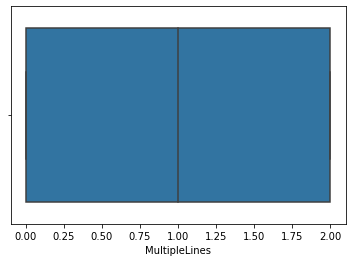

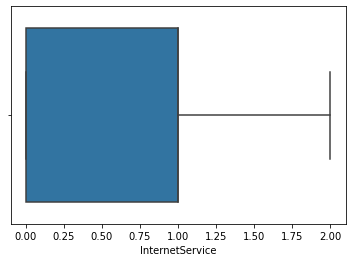

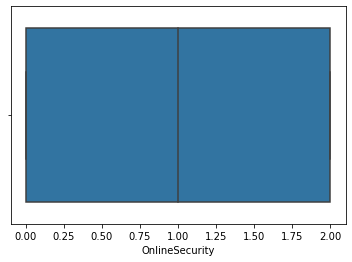

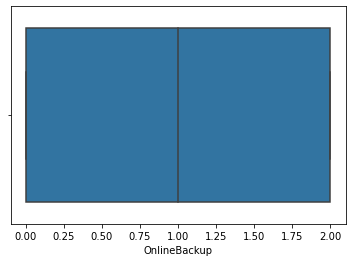

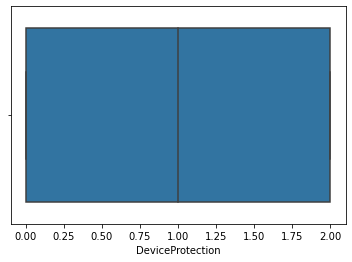

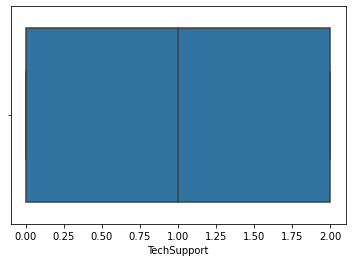

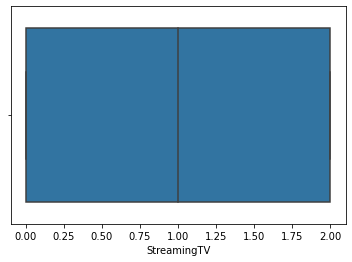

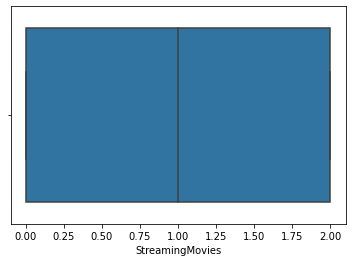

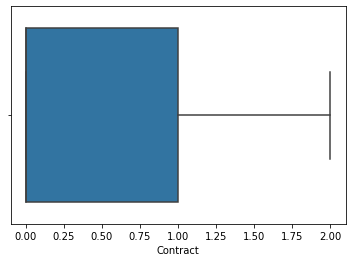

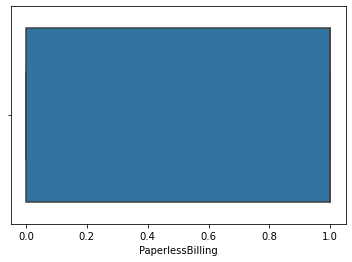

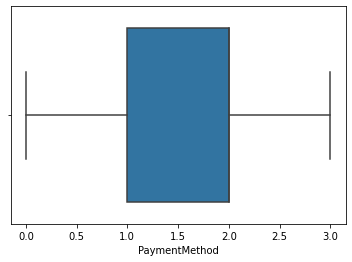

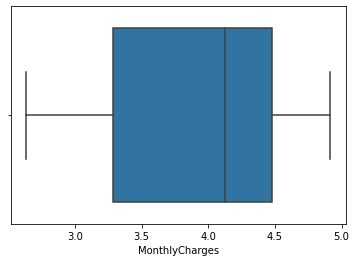

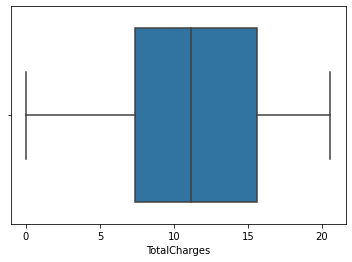

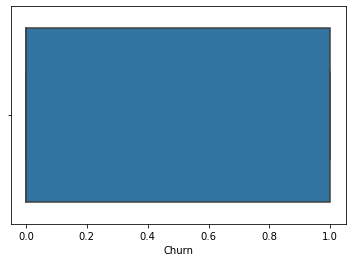

In [120]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.boxplot(df[column])
    ax.set_xlabel(column)
    plt.show()

We see that there are outliers present in the 'Senior Citizen' feature.

#### Skewness check

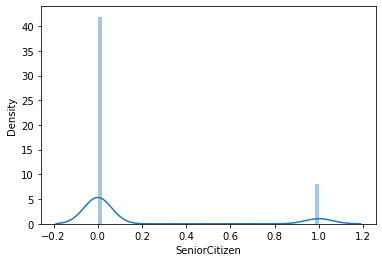

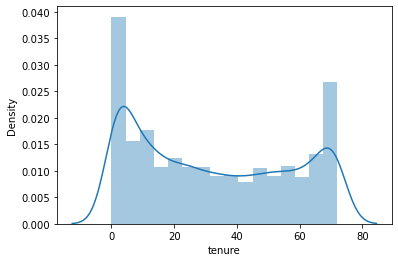

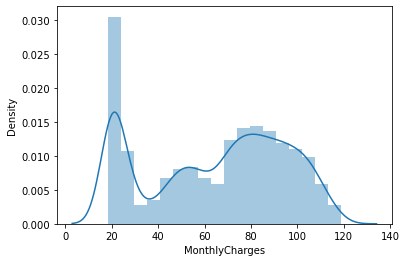

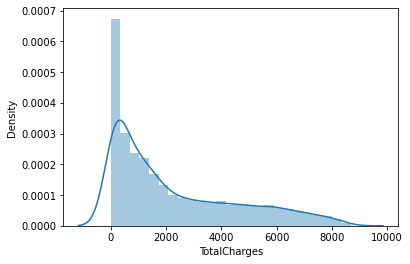

In [77]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.distplot(df_cp[column])
    ax.set_xlabel(column)
    plt.show()

The data distribution of all numerical features are not normally distributed.

### Feature Extraction

We will drop customer Id column as it is not of any importance to us for further model building.

In [79]:
df.drop('customerID',axis=1,inplace=True)

### Label Encoding

In [73]:
le=LabelEncoder()

In [82]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=le.fit_transform(df[col])

In [83]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Feature Transformation

we will try to remove skewness and not-normal distribution of data using transforms.

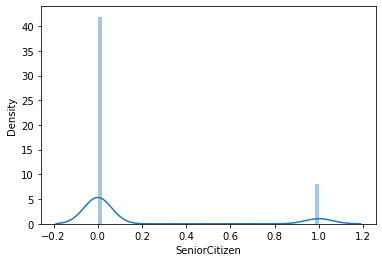

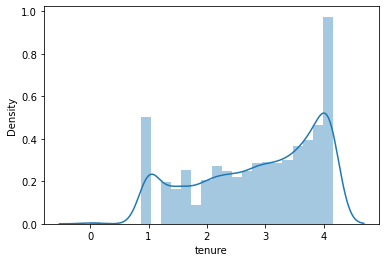

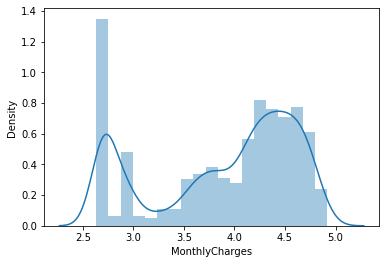

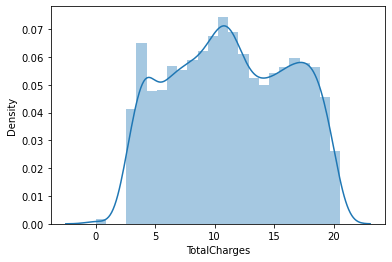

In [87]:
for column in numerical_cols:
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax=sn.distplot(np.cbrt(df_cp[column]))
    ax.set_xlabel(column)
    plt.show()

As the distribution of 'Total Chrages ' feature has become normal, we will keep cuberoot transformation for the numerical features.

In [88]:
for col in numerical_cols:
    df[col]=np.cbrt(df[col])

### Split dataset into independent and target features.

In [90]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [93]:
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


### Feature scaling

In [95]:
s=StandardScaler()

In [96]:
for col in x.columns:
    x[col]=s.fit_transform(x[col].values.reshape(-1,1))

### Finding best random state

In [97]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ",maxAccu," at random state ",maxRs)

Best Accuracy is  0.8240860215053764  at random state  129


## Step-4 Modelling

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=129)

In [99]:
print(x_train.shape)
print(y_train.shape)

(4718, 19)
(4718,)


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [101]:
lr=LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
er = ExtraTreesClassifier()

In [109]:
seed=7

models = []

models.append(('Losgistic Regression', lr))
models.append(('Random Forest', rf))
models.append(('KNN', knn))
models.append(('Decision Tree', dt))
models.append(('Gaussian', gnb))
models.append(('ExtraTreesRegressor', er))

In [110]:
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Losgistic Regression: 0.804771 
Random Forest: 0.791989 
KNN: 0.763024 
Decision Tree: 0.735057 
Gaussian: 0.756495 
ExtraTreesRegressor: 0.780062 


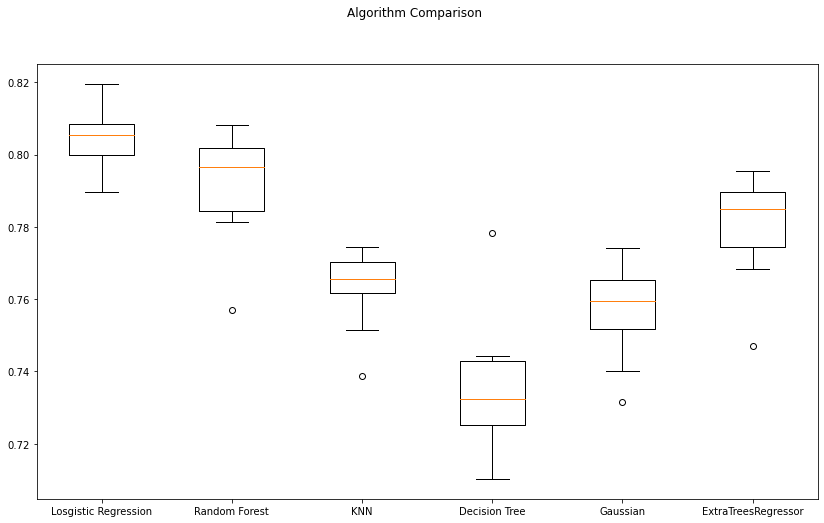

In [111]:
#Boxplot for algorithm comparision

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### We will go ahead with Logistic Regression model.

## Step-5 Hyper Parameter Tuning

In [116]:
from sklearn.model_selection import GridSearchCV
parameters={'multi_class' : ['auto', 'ovr', 'multinomial']}

model=lr

grid=GridSearchCV(estimator=model,param_grid=parameters)

grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.multi_class)
print(grid.best_params_)

0.8063336747532098
auto
{'multi_class': 'auto'}


In [117]:
fin_model=LogisticRegression(multi_class='auto')

## Step-6 Saving the model

In [ ]:
import joblib
joblib.dump(fin_model,'customer_churn.pkl')